In [2]:
import math
from random import *
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [3]:
#functions
def addTable():
    #randomize table orientation
    ns_table = bool(math.floor(random()*2))
    if ns_table and sum(x.count(1) for x in table_placement_ns) == 0:
        if sum(x.count(1) for x in table_placement_ew) == 0:
            return -1
        else:
            ns_table = False
    elif sum(x.count(1) for x in table_placement_ew) == 0:
        if sum(x.count(1) for x in table_placement_ns) == 0:
            return -1
        else:
            ns_table = True
    table_x = table[1-ns_table]
    table_y = table[ns_table]
    if ns_table:
        t = table_placement_ns
    else:
        t = table_placement_ew
    #count how many available positions there are for the specific table orientation
    available = sum(x.count(1) for x in t)
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y):
        for j in range(class_x):
            if t[i][j] == 1:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #update classroom
    for i in range(y, y+table_y):
        for j in range(x,x+table_x):
            classroom[i][j] = 1
    
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+table[ns_table]):
        for j in range(x-(table[0]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update table_placement_ew
    for i in range(y-(table[0]-1), y+table[ns_table]):
        for j in range(x-(table[1]-1), x+table[1-ns_table]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #update chair_placement    
    for i in range(y-(chair[0]), y+table[ns_table]+1):
        for j in range(x-(chair[0]), x+table[1-ns_table]+1):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                if i==y-(chair[0]) and j==x-(chair[0]) or i==y-chair[0] and j==x+table[1-ns_table] or i==y+table[ns_table] and j==x-chair[0] or i==y+table[ns_table] and j==x+table[1-ns_table]:
                    continue
                elif (i==y-chair[0] or i==y+table[ns_table] or j==x-chair[0] or j==x+table[1-ns_table]) and chair_placement[i][j]!=0:
                    chair_placement[i][j] = 2
                else:
                    chair_placement[i][j] = 0
    #add table
    tables.append([x, y, ns_table])

In [4]:
def addChair():
    #count how many chair positions there are
    pref = 2
    available = sum(x.count(pref) for x in chair_placement)
    if available <= 0:
        pref = 1
    if pref == 1:
        available = sum(x.count(pref) for x in chair_placement)
        if available <= 0:
            return -1
        
    #rng for which position
    num = math.ceil(random()*available)
    #put at that position
    for i in range(class_y):
        for j in range(class_x):
            if chair_placement[i][j] == pref:
                num -= 1
            if num == 0:
                x = j
                y = i
                break
        if num == 0:
            break
            
    #set up direction of chair
    if pref == 2:
        direction = math.floor(random()*8)*45
        #if x-1 >= 0 and classroom[x-1][y] == 1:
        #    direction = 180
    
    if pref == 1:
        direction = math.floor(random()*8)*45
    
    #update classroom
    for i in range(y, y+chair[0]):
        for j in range(x,x+chair[1]):
            classroom[i][j] = 2
            
    #update table_placement_ns
    for i in range(y-(table[1]-1), y+chair[0]):
        for j in range(x-(table[0]-1), x+chair[0]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ns[i][j] = 0
    
    #update talbe_placement_ew
    for i in range(y-(table[0]-1), y+chair[0]):
        for j in range(x-(table[1]-1), x+chair[0]):
            if i >= 0 and i < class_y and j >= 0 and j < class_x:
                table_placement_ew[i][j] = 0
    
    #update chair_placement
    for i in range(class_y):
        for j in range(class_x):
            if math.sqrt((i-y)**2 + (j-x)**2) < 6:
                chair_placement[i][j] = 0
    
    #add chair
    chairs.append([x,y,direction])

In [5]:
#set input
students = 10
class_y = 30
class_x = 20
table_long = 4
table_short = 2
table_num = 10
if (table_short > table_long):
    temp = table_short
    table_short = table_long
    table_long = temp
table = [int(table_short),int(table_long)]
chair = [2,2] #make sure 0 index is smaller than 1 index

Enter length of classroom in feet: 30
Enter width of classroom in feet: 20


In [7]:
#set up arrays
tables = []
chairs = []
classroom = [[0 for i in range(class_x)] for j in range(class_y)]
chair_placement = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    chair_placement[i][class_x-1] = 0       
for j in range(class_x):
    chair_placement[class_y-1][j] = 0  
table_placement_ns = [[1 for i in range(class_x)] for j in range(class_y)]
table_placement_ew = [[1 for i in range(class_x)] for j in range(class_y)]
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_long-1) or i >= class_y-(table_short-1):
            table_placement_ew[i][j] = 0
for i in range(class_y):
    for j in range(class_x):
        if j >= class_x-(table_short-1) or i >= class_y-(table_long-1):
            table_placement_ns[i][j] = 0
            
#adding tables and chairs
for i in range(table_num):
    if (addTable() == -1):
        print("Not enough space!")
        
for i in range(students):
    if (addChair() == -1):
        print("Not enough space!")

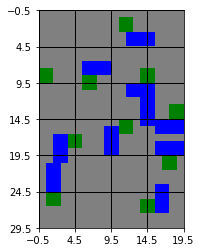

In [8]:
# create discrete colormap
cmap = colors.ListedColormap(['grey','blue','green'])
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(classroom, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-.5, class_x, 5))
ax.set_yticks(np.arange(-.5, class_y, 5))

plt.show()

In [9]:
#Debug
#for i in range(class_y):
#    print(classroom[i], end = "\n")
#print("\n")
#for i in range(class_y):
#    print(table_placement_ns[i], end = "\n")
#print("\n")
#for i in range(class_y):
#    print(table_placement_ew[i], end = "\n")
#print("\n")
#for i in range(class_y):
#    print(chair_placement[i], end = "\n")

print("Tables: ") 
print(tables)
print("Chairs: ") 
print(chairs)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0,